# Sentiment Analysis: IMDB Movie Reviews

<img src='https://upload.wikimedia.org/wikipedia/commons/6/69/IMDB_Logo_2016.svg'>

## Loading Data

In [3]:
import os

def fetch_reviews(path):
  data = []
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())
      
  return data

In [4]:
import pandas as pd

df_train_pos = pd.DataFrame({'review': fetch_reviews('spanish/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('spanish/train/neg/'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('spanish/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('spanish/test/neg/'), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (25000, 2)


,review,label
0,Uno de los otros críticos ha mencionado que de...,1
1,Una pequeña pequeña producción.La técnica de f...,1
2,"Después del éxito de la muerte, y se trata de ...",1
3,"Gas de Prussic, un asesino que se pone un traj...",1
4,Jean Dujardin obtiene los manierismos de Conne...,1


## EDA

In [5]:
# No null values in dataset.
df['review'].isnull().sum()

0

In [6]:
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])

Total Number of positive reviews in data:  12500
Total Number of negative reviews in data:  12500


__Observation:__ Data contains equal amount of positive and negative reviews.

In [7]:
# sample positive movie review
df[df['label']==1].sample(n=1)['review'].iloc[0]

'Al principio, honestamente pensé que sería una película cursi.Pero después de ver esto, me sorprendió bastante.Amanda Bynes fue convincentemente divertida junto con el reparto de apoyo (especialmente ese personaje jugado por "Tony Tooth Tony" de Snatch. ¡Qué papel contrastante entre esas dos películas!).Ahora, no soy uno para decir si un actor es bueno o no, pero su acto, especialmente, fue completamente agradable.A pesar de que la trama se convirtió en un triángulo de amor de adolescentes y bopper (aunque muy divertido) a la mitad de la película, siento que esto no debería descontar, lo que creo, la película realmente es: simplemente entretenida.Entonces, si se tropieza con él, ya sea por DVD o teatro, confío en que disfrutará.'

In [8]:
# sample negative review
df[df['label']==0].sample(n=1)['review'].iloc[0]

'El rumor lo dice que cuando se les pidió a los asesores técnicos de la NASA a esta película que mantuvieran la imagen creíble, se rieron durante varias horas.Después de todo, a menos que seas un político o trabajo / tripulación del transbordador, no vas a entrar en el servicio de transporte.Además, el campamento de espacio (cadete) está en Alabama, no en Florida. La verdad es que todos en la Tierra ganarán premios de lotería de múltiples mil millones de dólares antes de que los eventos representados en esta película sean posibles.Esta película fue destinada a los niños, y tuvo que haber sido escrito por uno, porque no son conscientes de las innumerables restricciones y requisitos con respecto al acceso a KSC / CCAFS.Esta es la película más inútil de todos los tiempos, y fue un merecido.fracaso.'

In [9]:
# word_count in reviews
word_counts = df['review'].apply(lambda x: len(x.split()))

word_counts.describe()

count    25000.000000
mean       237.311320
std        179.421786
min          9.000000
25%        123.000000
50%        172.000000
75%        294.000000
max       1827.000000
Name: review, dtype: float64

__Observations:__  Most of the reviews have words 200-350.

## Data processing

In [10]:
import re
# import nltk
# nltk.download('punkt') # At first you have to download these nltk packages.
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # data cleaning
  review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
  review = review.lower()
  
  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
  review = ' '.join(review)
  
  return review

In [11]:
import nltk
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

,review,label,preprocessed_review
0,Uno de los otros críticos ha mencionado que de...,1,uno de los otros cr ticos ha mencionado que de...
1,Una pequeña pequeña producción.La técnica de f...,1,una peque peque producci n la cnica de filmaci...
2,"Después del éxito de la muerte, y se trata de ...",1,despu del xito de la muerte se trata de que se...
3,"Gas de Prussic, un asesino que se pone un traj...",1,gas de prussic un asesino que se pone un traje...
4,Jean Dujardin obtiene los manierismos de Conne...,1,jean dujardin obtiene los manierismos de conne...


#### Positive Reviews Wordcloud

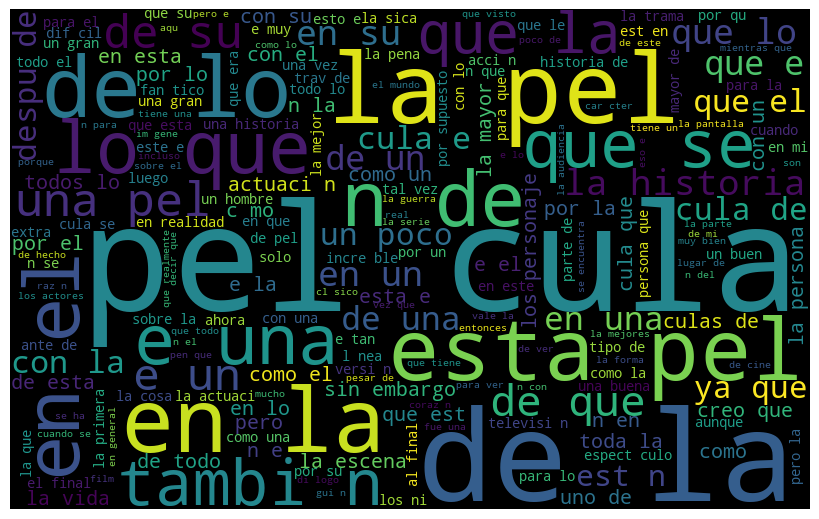

In [12]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Negative Reviews Wordcloud

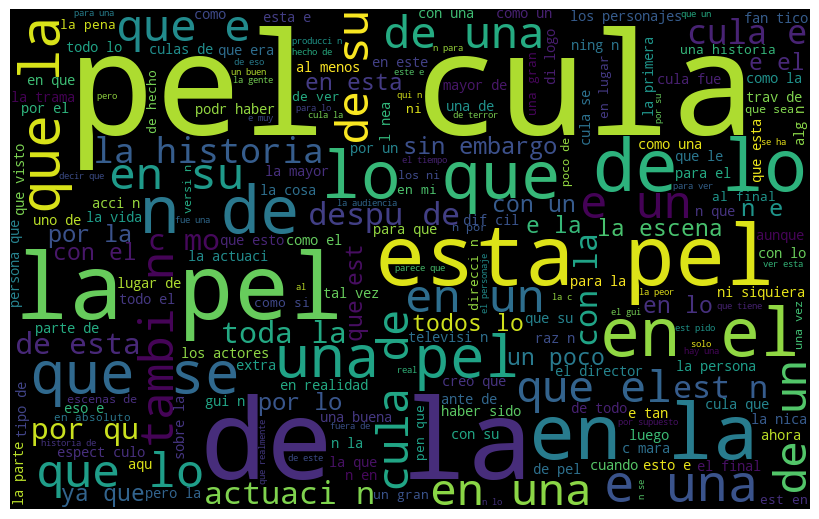

In [13]:
words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Splitting data(70-30): Train | Test

In [14]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (17500, 2) (17500,)
Test data: (7500, 2) (7500,)


## Vectorizing Text Data

#### BOW

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=10)

X_train_review_bow = vect.fit_transform(X_train['preprocessed_review'])
X_test_review_bow = vect.transform(X_test['preprocessed_review'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (17500, 17912)
X_test_review_bow shape:  (7500, 17912)


#### TFIDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (17500, 17912)
X_test_review_tfidf shape:  (7500, 17912)


## Building Models

#### Naive Bayes: BOW

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred))
nb_bow = accuracy_score(y_test, y_pred)

Test Accuracy:  0.8285333333333333


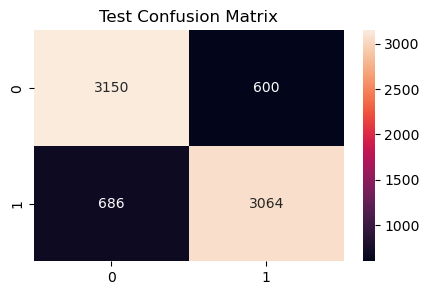

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

#### Naive Bayes: TFIDF

In [19]:
clf = MultinomialNB(alpha=1)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))
nb_tfidf = accuracy_score(y_test, y_pred)

Test Accuracy:  0.844


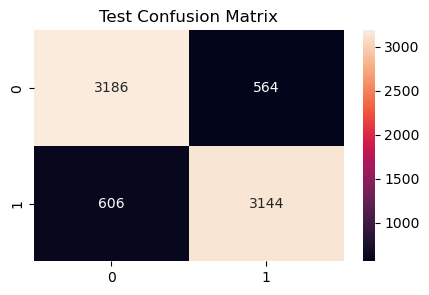

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

#### Logistic Regression: TFIDF

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))
lr_tfidf = accuracy_score(y_test, y_pred)

Test Accuracy:  0.8665333333333334


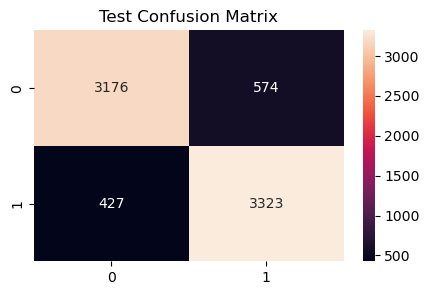

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

#### Neural network

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_review'], df['label'], test_size=0.3, stratify=df['label'])

# Create a tokenizer and fit it on the training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert the text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
max_sequence_length = 100  # Set the maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define the neural network model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=10, batch_size=64, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, y_pred)

print('Test Accuracy (Neural Network):', nn_accuracy)

Epoch 1/10
274/274 [==============================] - 80s 272ms/step - loss: 0.4856 - accuracy: 0.7572 - val_loss: 0.4222 - val_accuracy: 0.8233
Epoch 2/10
274/274 [==============================] - 73s 267ms/step - loss: 0.1990 - accuracy: 0.9273 - val_loss: 0.4430 - val_accuracy: 0.8229
Epoch 3/10
274/274 [==============================] - 73s 266ms/step - loss: 0.0700 - accuracy: 0.9785 - val_loss: 0.5997 - val_accuracy: 0.8143
Epoch 4/10
235/235 [==============================] - 9s 34ms/step
Test Accuracy (Neural Network): 0.8109333333333333


## Conclusion

In [25]:
!pip install prettytable
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Model', 'Accuracy']
x.add_row(['Naive Bayes', nb_bow])
x.add_row(['Naive Bayes', nb_tfidf])
x.add_row(['Logistic Regression', lr_tfidf])
x.add_row(['Neural Network', nn_accuracy])
print(x)

+---------------------+--------------------+
|        Model        |      Accuracy      |
+---------------------+--------------------+
|     Naive Bayes     | 0.8285333333333333 |
|     Naive Bayes     |       0.844        |
| Logistic Regression | 0.8665333333333334 |
|    Neural Network   | 0.8109333333333333 |
+---------------------+--------------------+
